Before you turn this lab in, make sure everything runs as expected. **Restart and run all cells** (in the menubar, select Kernel$\rightarrow$Restart & Run All) then check the output is as expected and there are no errors.  Also remember to **Save** before uploading this file (File$\rightarrow$Save and Checkpoint).

---

# <div align="center">Quantum Computer Systems Design</div>&nbsp;  <div align="center">Lab 2</div> 

### 1. Quantum Measurements
How do we read out information from a quantum computer? In this problem, we will work with the different ways you may measure quantum states. 

#### 1.1 Measuring single-qubit states
Consider the following quantum program that prepares a quantum state and then performs a measurement.

In [60]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer, plot_bloch_multivector
from qiskit.quantum_info import state_fidelity, Operator
from qiskit import BasicAer
# Use the simulator from qiskit Aer
backend = BasicAer.get_backend('qasm_simulator')

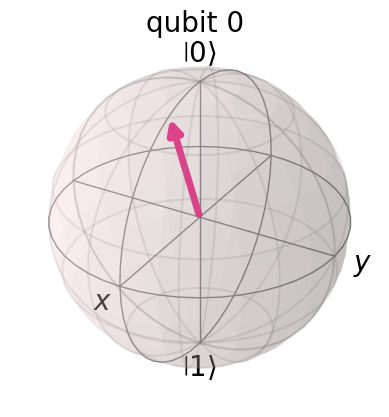

In [61]:
def draw_bloch(qc):
    state_simulator = BasicAer.get_backend('statevector_simulator')
    result = execute(qc, state_simulator).result()
    return plot_bloch_multivector(result.get_statevector(qc))

qc1_prep = QuantumCircuit(1, 1) # Initialize circuit with one qubit
qc1_prep.ry(np.pi/8, 0) # prepare quantum state

draw_bloch(qc1_prep) # Visualize prepared state on Bloch sphere

In [62]:
qc1 = QuantumCircuit(1, 1) # Initialize circuit with one qubit
qc1 += qc1_prep # Prepare quantum state
qc1.measure(0, 0) # Z-basis measurement

qc1.draw(fold=-1) # Visualize quantum circuit

/var/folders/6b/d33yz61x5gg85x6s_tyl7lbh0000gn/T/ipykernel_16385/2181822744.py:2: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  qc1 += qc1_prep # Prepare quantum state


┌─────────┐┌─┐
  q: ┤ Ry(π/8) ├┤M├
     └─────────┘└╥┘
c: 1/════════════╩═
                 0

In [63]:
job = execute(qc1, backend, shots=1000) # Simulate
job.result().get_counts(qc1)

{'0': 971, '1': 29}

##### 1.1.1 Z-basis measurement
Recall the definition of a z-basis measurement is to apply the $Z$ observable, written as:
$$Z = (+1)E_0 + (-1)E_1$$
where $E_0=|0\rangle\langle 0|$ and $E_1=|1\rangle\langle 1|$ are the orthogonal projectors associated with the z-basis.

What is the probability `pz` of obtaining $|0\rangle$ from the measurement?

In [64]:
import numpy as np

# The angle of rotation around the y-axis
theta = np.pi / 8

# Probability of measuring the state |0>
pz = np.cos(theta / 2)**2

print(pz)

0.9619397662556434


In [65]:
# The autograder will test the value stored in `pz`
# Pass all the below test(s) and the hidden tests for full credit
assert 0 <= pz <= 1, 'The probability should be between 0 and 1'

##### 1.1.2 Z-basis measurement (continued)
What is the expectation value of the above measurement, $\langle Z\rangle$?

In [66]:
Z = np.cos(theta)
print(Z)

0.9238795325112867


In [67]:
# The autograder will test the value stored in `Z`
assert float(Z) == Z, 'The value should be a real number'

##### 1.1.3 X-basis measurement
Similarly the definition of an x-basis measurement is to apply the $X$ observable, written as:
$$X = (+1)E_+ + (-1)E_-$$
where $E_+=|+\rangle\langle +|$ and $E_-=|-\rangle\langle -|$ are the orthogonal projectors associated with the x-basis.

Sine Qiskit only support z-basis measurement, we need to create our own x-basis measurement. Use the fact that $HZH=X$, write down the circuit that accomplishes the x-basis measurment for the same quantum state from the last question:

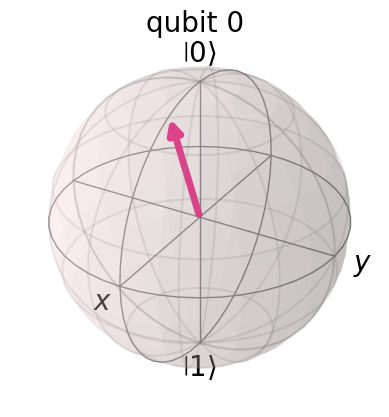

In [68]:
qc2_prep = QuantumCircuit(1, 1) # Initialize circuit with one qubit
qc2_prep.ry(np.pi/8, 0) # Prepare quantum state

draw_bloch(qc2_prep) # Visualize on Bloch sphere

In [69]:
qc2 = QuantumCircuit(1, 1) # Initialize circuit with one qubit
qc2 += qc2_prep # Prepare quantum state
qc2.h(0)
qc2.measure(0, 0)
qc2.draw(fold=-1) # Visualize quantum circuit

/var/folders/6b/d33yz61x5gg85x6s_tyl7lbh0000gn/T/ipykernel_16385/4064953862.py:2: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  qc2 += qc2_prep # Prepare quantum state


┌─────────┐┌───┐┌─┐
  q: ┤ Ry(π/8) ├┤ H ├┤M├
     └─────────┘└───┘└╥┘
c: 1/═════════════════╩═
                      0

In [70]:
job = execute(qc2, backend, shots=1000) # Simulate
job.result().get_counts(qc2)

{'0': 679, '1': 321}

In [71]:
# Validate and test your circuit `qc2`
_qc2_prep = QuantumCircuit(1, 1)
_qc2_prep.ry(np.pi/8, 0)
assert qc2_prep[:] == _qc2_prep[:], 'Do not modify the state preparation part'
assert qc2[:len(_qc2_prep)] == _qc2_prep[:], 'Do not modify the state preparation part'

_meas = QuantumCircuit(1, 1)
_meas.measure(0, 0)
assert qc2[-1:] == _meas[:], 'Your circuit must end with a measurement'

# Hidden tests

##### 1.1.4 X-basis measurement (continued)
What is the probability `pz` of obtaining $|+\rangle$ from the measurement?

In [72]:
inner_product_plus_psi = (1/np.sqrt(2)) * (np.cos(theta/2) + np.sin(theta/2))

# The probability p+ of obtaining |+>
px = abs(inner_product_plus_psi)**2

print(px)

0.6913417161825447


In [73]:
# The autograder will test the value stored in `px`
assert 0 <= px <= 1, 'The probability should be between 0 and 1'

##### 1.1.5 X-basis measurement (continued)
What is the expectation value of the above measurement, $\langle X\rangle$?

In [74]:
inner_product_plus = (1/np.sqrt(2)) * (np.cos(theta/2) + np.sin(theta/2))  # < + | psi >
inner_product_minus = (1/np.sqrt(2)) * (np.cos(theta/2) - np.sin(theta/2)) # < - | psi >

# The expectation value <X>
X = abs(inner_product_plus)**2 - abs(inner_product_minus)**2

print(X)

0.3826834323650896


In [75]:
# The autograder will test the value stored in `X`
assert float(X) == X, 'The value should be a real number'

#### 1.2 Measuring multi-qubit states
Consider the following quantum program that prepares the quantum state $|\psi\rangle=\frac{1}{\sqrt{3}}(|01\rangle+|10\rangle+|11\rangle)$.

In [76]:
qc3_prep = QuantumCircuit(2, 1) # Initialize circuit with two qubits
# Prepare quantum state
qc3_prep.ry(np.arccos(1/3**0.5)*2, 0)
qc3_prep.cry(np.pi/2, 0, 1)
qc3_prep.x(1)

qc3_prep.draw(fold=-1)

┌────────────┐                
q_0: ┤ Ry(1.9106) ├─────■──────────
     └────────────┘┌────┴────┐┌───┐
q_1: ──────────────┤ Ry(π/2) ├┤ X ├
                   └─────────┘└───┘
c: 1/══════════════════════════════

In [77]:
# Compute the state psi
state_simulator = BasicAer.get_backend('statevector_simulator')
result = execute(qc3_prep, state_simulator).result()
psi = result.get_statevector(qc3_prep)
print(f'psi = {psi.round(10)!r}')

psi = array([0.        +0.j, 0.57735027+0.j, 0.57735027+0.j, 0.57735027+0.j])


In [78]:
# Scratch space (you may also add new cells anywhere in this notebook if needed)

# You may copy code from earlier in this notebook and run it on qc3_prep

##### 1.2.1 Partial measurement
Say we want to measure observable $I\otimes X$.  What is the probability of measuring $|+\rangle$ on the second qubit?  You may calculate $p_{IX}$ by hand or compute it using the variable `psi` calculated above.

In [79]:
# psi is the statevector from the quantum circuit
# We calculate the probability of measuring |+> on the second qubit

# Defining the state |+> for a single qubit
plus_state = np.array([1/np.sqrt(2), 1/np.sqrt(2)])

# Calculating the probabilities for each component where the second qubit is in |+>
pix_0plus = np.abs(np.dot(psi[0:2], plus_state))**2  # Component |0+>
pix_1plus = np.abs(np.dot(psi[2:4], plus_state))**2  # Component |1+>

# Total probability p_IX
pix = pix_0plus + pix_1plus

pix  # Displaying the probability p_IX


print(pix)

0.8333333333333331


In [80]:
# The autograder will test the value stored in `pix`
assert 0 <= pix <= 1, 'The probability should be between 0 and 1'

##### 1.2.2 Partial measurement (continued)
What is the post-measurement state for the first qubit? Write down the density matrix representation of the quantum state. For example, if your answer is $\rho = \begin{pmatrix}1/2 & 0\\ 0 & 1/2\end{pmatrix}$, enter
```python
rho = np.array([[1/2, 0],
                [0, 1/2]])
```
You may calculate $\rho$ by hand or compute it using the variable `psi` calculated earlier.

In [81]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.quantum_info import Statevector, partial_trace
import numpy as np

# Given quantum circuit setup (you should replace this with your actual circuit setup)
qc = QuantumCircuit(2)
qc.ry(np.arccos(1/3**0.5)*2, 0)
qc.cry(np.pi/2, 0, 1)
qc.x(1)

# Getting the statevector from the circuit
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
psi = Statevector(result.get_statevector(qc))

# Create a circuit to project the second qubit onto |+>
projection_circuit = QuantumCircuit(2)
projection_circuit.h(1)
projection_circuit.measure_all()
projection_circuit.remove_final_measurements()

# Evolve the psi state with the projection circuit
projected_psi = psi.evolve(projection_circuit)

# Tracing out the second qubit to get the reduced density matrix for the first qubit
rho = partial_trace(projected_psi, [1])

# Convert the DensityMatrix object to a numpy array
rho = rho.data

# Display the density matrix
print(rho)


[[0.33333333+0.j 0.33333333+0.j]
 [0.33333333+0.j 0.66666667+0.j]]


In [82]:
# The autograder will test the value stored in `rho`
assert rho.shape == (2, 2), 'rho must be a 2 by 2 numpy array'
assert np.isclose(np.trace(rho), 1), 'Invalid density matrix: the trace must equal 1'

#### 1.3 A sequence of projective measurements

Consider the following quantum program that prepares the boring quantum state $|\psi\rangle=|00\rangle$.  We will look at the result of making projective measurements on this state.

In [83]:
qc4_prep = QuantumCircuit(2) # Initialize circuit with two qubits
# Prepare quantum state
# No gates

qc4_prep.draw(fold=-1)

q_0: 
     
q_1:

In [84]:
# Compute the state psi
state_simulator = BasicAer.get_backend('statevector_simulator')
result = execute(qc4_prep, state_simulator).result()
psi4 = result.get_statevector(qc4_prep)
print(f'psi = {psi4.round(10)!r}')

psi = array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])


In [85]:
# The observable X⊕X
o1_circ = QuantumCircuit(2)
o1_circ.x(0)
o1_circ.x(1)

o1_circ.draw(fold=-1)

┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ X ├
     └───┘

In [86]:
# The observable Z⊕Z
o2_circ = QuantumCircuit(2)
o2_circ.z(0)
o2_circ.z(1)

o2_circ.draw(fold=-1)

┌───┐
q_0: ┤ Z ├
     ├───┤
q_1: ┤ Z ├
     └───┘

In [87]:
q = QuantumRegister(3, 'q')
c = ClassicalRegister(1, 'c')
qc4 = QuantumCircuit(q, c) # Initialize circuit with two qubits

# Prepare the initial state (qubits 1 and 2)
qc4.append(qc4_prep.to_gate(label='prep'), [1, 2])
qc4.barrier()

# Measure observable 1
qc4.h(0)
qc4.append(o1_circ.to_gate(label='O1').control(), [0, 1, 2])
qc4.h(0)
qc4.measure(0, c)
qc4.barrier()

qc4.x(0, label='reset').c_if(c, 1)  # Reset the measurement qubit to 0
qc4.z(2).c_if(c, 1)
qc4.barrier()

# Measure observable 2
qc4.h(0)
qc4.append(o2_circ.to_gate(label='O2').control(), [0, 1, 2])
qc4.h(0)
qc4.measure(0, c)
qc4.barrier()

qc4.x(0, label='reset').c_if(c, 1)  # Reset the measurement qubit to 0

qc4.draw(fold=-1)

░ ┌───┐       ┌───┐┌─┐ ░ ┌───────┐        ░ ┌───┐       ┌───┐┌─┐ ░ ┌───────┐
q_0: ──────────░─┤ H ├───■───┤ H ├┤M├─░─┤ reset ├────────░─┤ H ├───■───┤ H ├┤M├─░─┤ reset ├
     ┌───────┐ ░ └───┘┌──┴──┐└───┘└╥┘ ░ └───╥───┘        ░ └───┘┌──┴──┐└───┘└╥┘ ░ └───╥───┘
q_1: ┤0      ├─░──────┤0    ├──────╫──░─────╫────────────░──────┤0    ├──────╫──░─────╫────
     │  prep │ ░      │  O1 │      ║  ░     ║     ┌───┐  ░      │  O2 │      ║  ░     ║    
q_2: ┤1      ├─░──────┤1    ├──────╫──░─────╫─────┤ Z ├──░──────┤1    ├──────╫──░─────╫────
     └───────┘ ░      └─────┘      ║  ░     ║     └─╥─┘  ░      └─────┘      ║  ░     ║    
                                   ║     ┌──╨──┐ ┌──╨──┐                     ║     ┌──╨──┐ 
c: 1/══════════════════════════════╩═════╡ 0x1 ╞═╡ 0x1 ╞═════════════════════╩═════╡ 0x1 ╞═
                                   0     └─────┘ └─────┘                     0     └─────┘

In [88]:
# Scratch space (you may also add new cells anywhere in this notebook if needed)

# You may copy code from earlier in this notebook and run it

##### 1.3.1 Projective measurement
What is the state vector `psi_after_o1_0` (for qubits 1 and 2) after measureing $O_1$, the observable $X\otimes X$ (at the 2nd barrier)?  Assume the outcome of the measurement is 0.

For example, if your answer is $\psi = \begin{pmatrix}1/2 \\ 1/2 \\ 1/2 \\ -1/2\end{pmatrix}$, enter
```python
psi_after_o1_0 = np.array([1, 1, 1, -1]) / 2
```

In [99]:

psi_after_o1_0 = np.array([1, 0, 0, 1]) / np.sqrt(2)


print(psi_after_o1_0)

[0.70710678 0.         0.         0.70710678]


In [100]:
# The autograder will test the value stored in `psi_after_o1_0`
assert psi_after_o1_0.shape == (4,), (
    'psi_after_o1_0 must be a 1D numpy array with 4 entries')
assert np.isclose(np.linalg.norm(psi_after_o1_0), 1), (
    'The state vector must be normalized')

##### 1.3.2 Projective measurement (continued)
What is the state vector `psi_after_o1_1` (for qubits 1 and 2) after measureing $O_1$, the observable $X\otimes X$ (at the 2nd barrier)?  **Assume the outcome of the measurement is 1.**

In [103]:
psi_after_o1_1 = np.array([1, 0, 0, -1]) / np.sqrt(2)


print(psi_after_o1_1)

[ 0.70710678  0.          0.         -0.70710678]


In [104]:
# The autograder will test the value stored in `psi_after_o1_1`
assert psi_after_o1_1.shape == (4,), (
    'psi_after_o1_1 must be a 1D numpy array with 4 entries')
assert np.isclose(np.linalg.norm(psi_after_o1_1), 1), (
    'The state vector must be normalized')

##### 1.3.3 Projective measurement 2
What is the state vector $\psi_1$ (for qubits 1 and 2) after measureing $O_2$, the observable $Z\otimes Z$ (at the 4th barrier)?

In [111]:
psi_after_o2 = np.array([1, 0, 0, 1]) / np.sqrt(2) #to review

print(psi_after_o2)

[0.70710678 0.         0.         0.70710678]


In [110]:
# The autograder will test the value stored in `psi_after_o2`
assert psi_after_o2.shape == (4,), (
    'psi_after_o2 must be a 1D numpy array with 4 entries')
assert np.isclose(np.linalg.norm(psi_after_o2), 1), (
    'The state vector must be normalized')